In [1]:
# personally made imports
import acquire_p

# typical imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# modeling methods
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression, LassoLars, TweedieRegressor
from sklearn.preprocessing import PolynomialFeatures

# working with dates
from datetime import datetime

# to evaluated performance using rmse
from sklearn.metrics import mean_squared_error
from math import sqrt 

# for tsa 
import statsmodels.api as sm

# holt's linear trend model. 
from statsmodels.tsa.api import Holt

#clean look
import warnings
warnings.filterwarnings("ignore")

get_bilancino_data()
prepare(df)


In [2]:
lake = acquire_p.get_bilancino_data()

In [4]:
lake = acquire_p.prepare(lake)

In [7]:
cat_col = lake.columns

In [108]:
def visual(df):
    plt.figure(figsize=(16, 16))
    for i, col in enumerate(cat_col):
        plot_number = i + 1
        l= len(cat_col)
        plt.subplot(9,1,plot_number)
        sns.lineplot(x = df.index, y = df[col])
        plt.suptitle('---------------------20XX-------------------')
plt.tight_layout()

<Figure size 432x288 with 0 Axes>

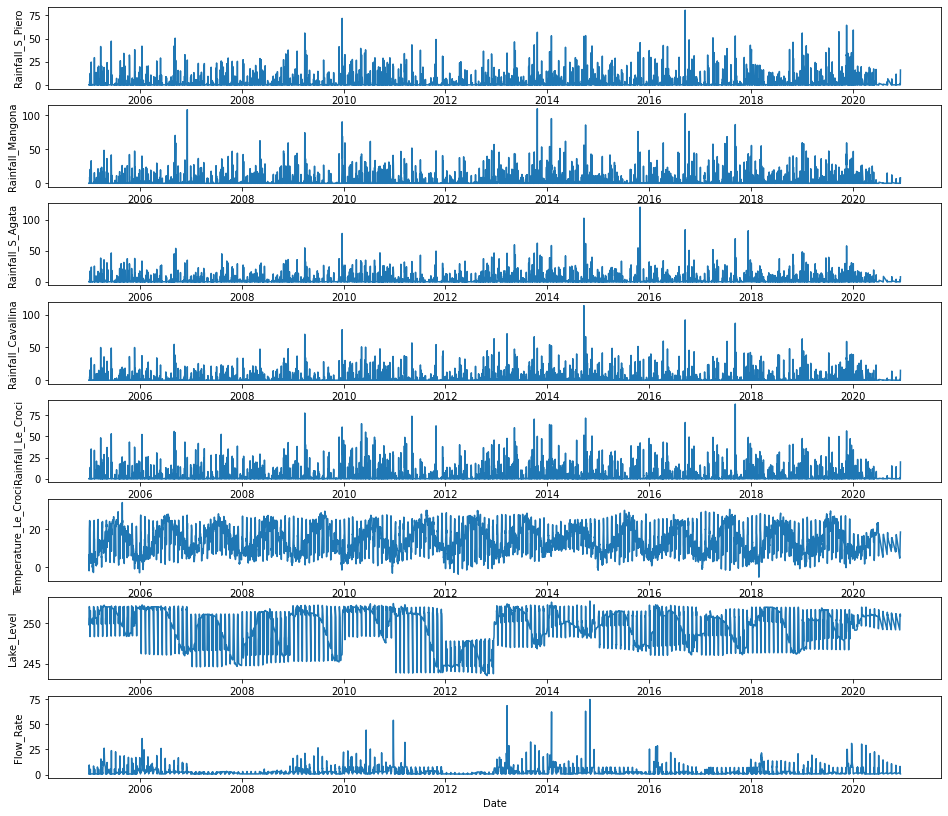

In [45]:
visual(lake)

# Takeaway
I think the patterns are a little lost in the noise. I am going to try resampling on a monthly basis

# Monthly

In [10]:
lake_m = lake.resample('M').mean()

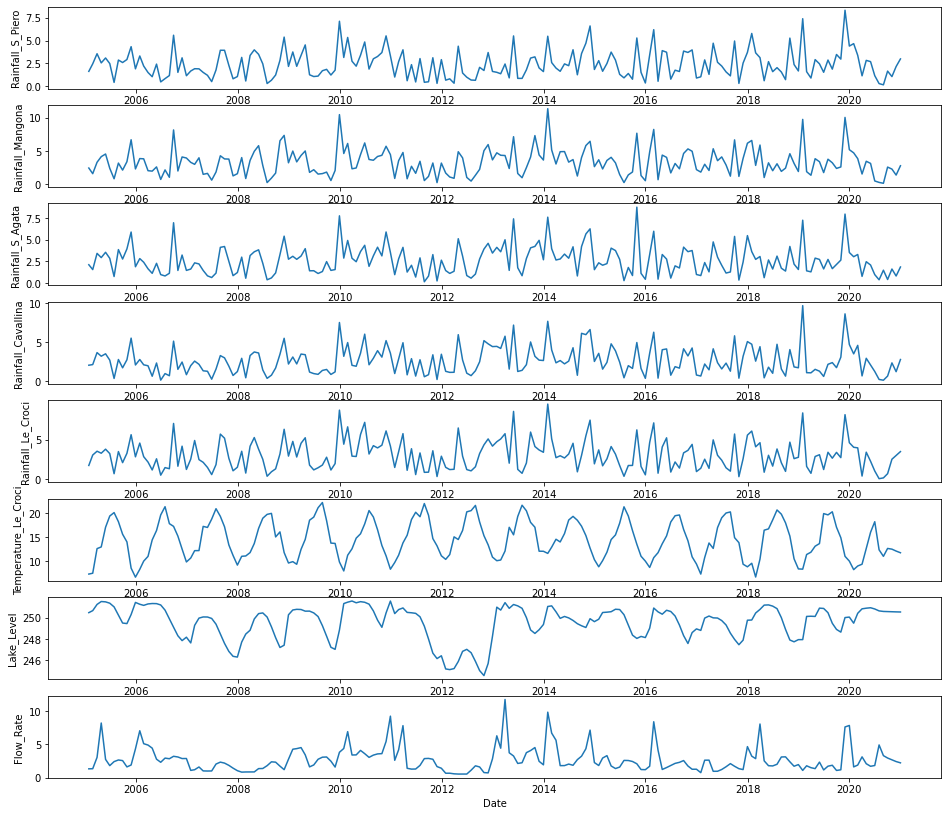

In [47]:
visual(lake_m)

# I have all continuous variables so I will use Spearman or Pearson
# Spearman is better with monotonic data so I choose that one

<AxesSubplot:ylabel='Date'>

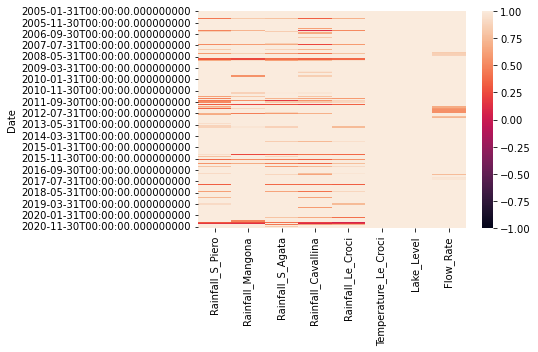

In [17]:
sns.heatmap(lake_m, vmin = -1, vmax = 1)

In [ ]:
# difficult to see the variations, I will try 3M boxes

In [19]:
lake_3m = lake.resample('3M').mean()

<AxesSubplot:ylabel='Date'>

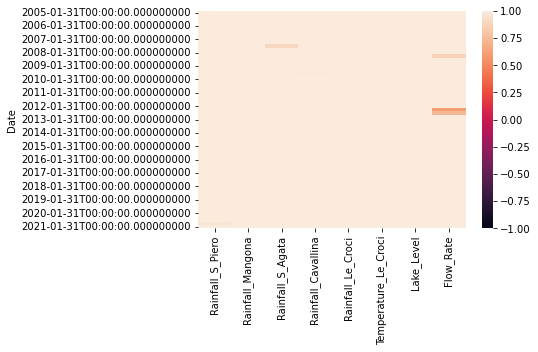

In [20]:
sns.heatmap(lake_3m, vmin = -1, vmax = 1)

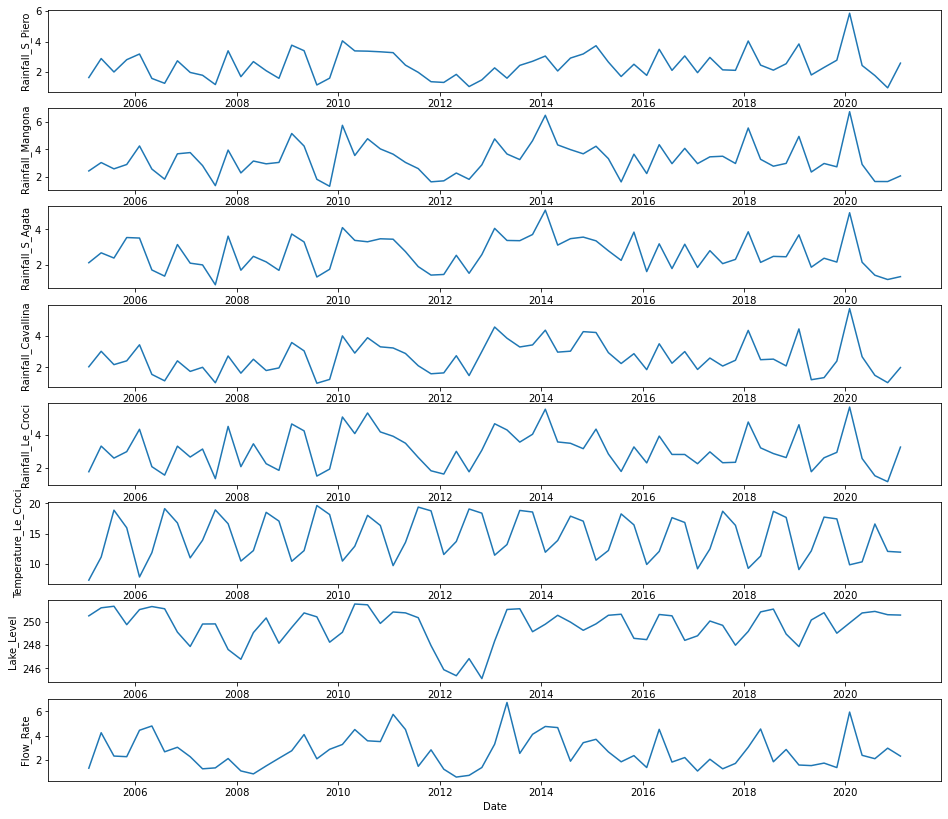

In [48]:
visual(lake_3m)

# Takeaway
# 3m smoothes the data out too much in my opinion

# Look at the data on a year by year basis

In [110]:
l = ['05', '06', '07', '08', '09', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20']

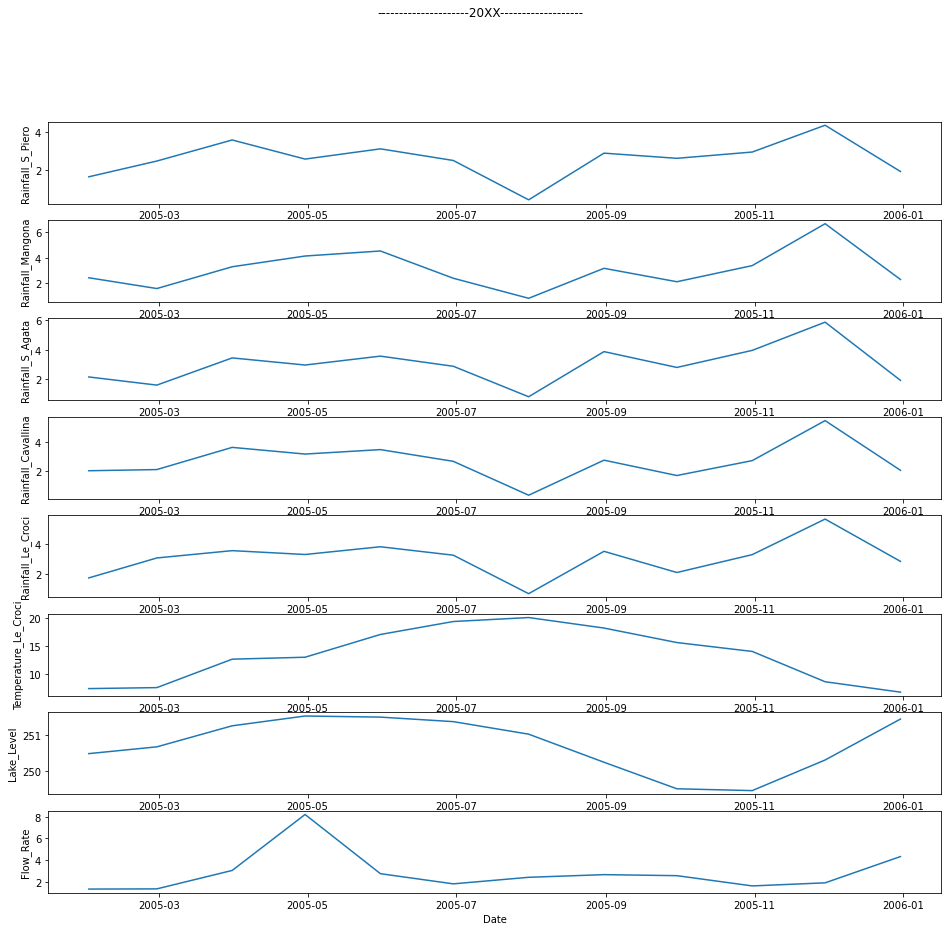

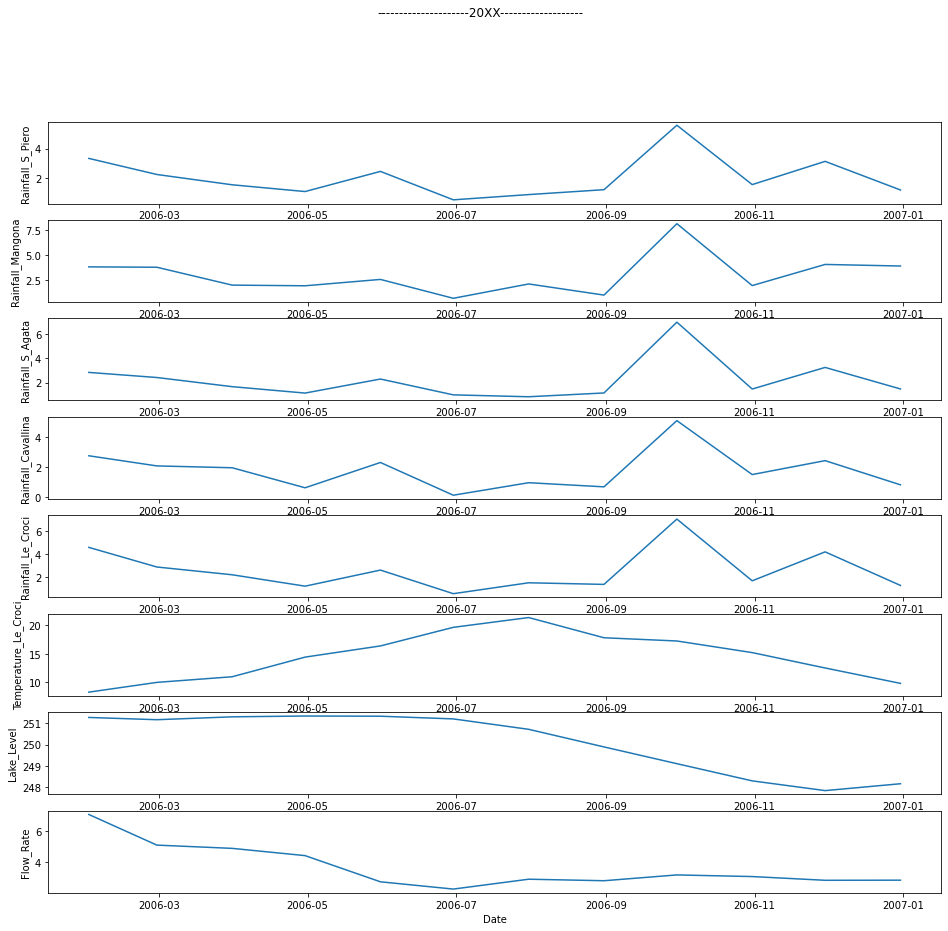

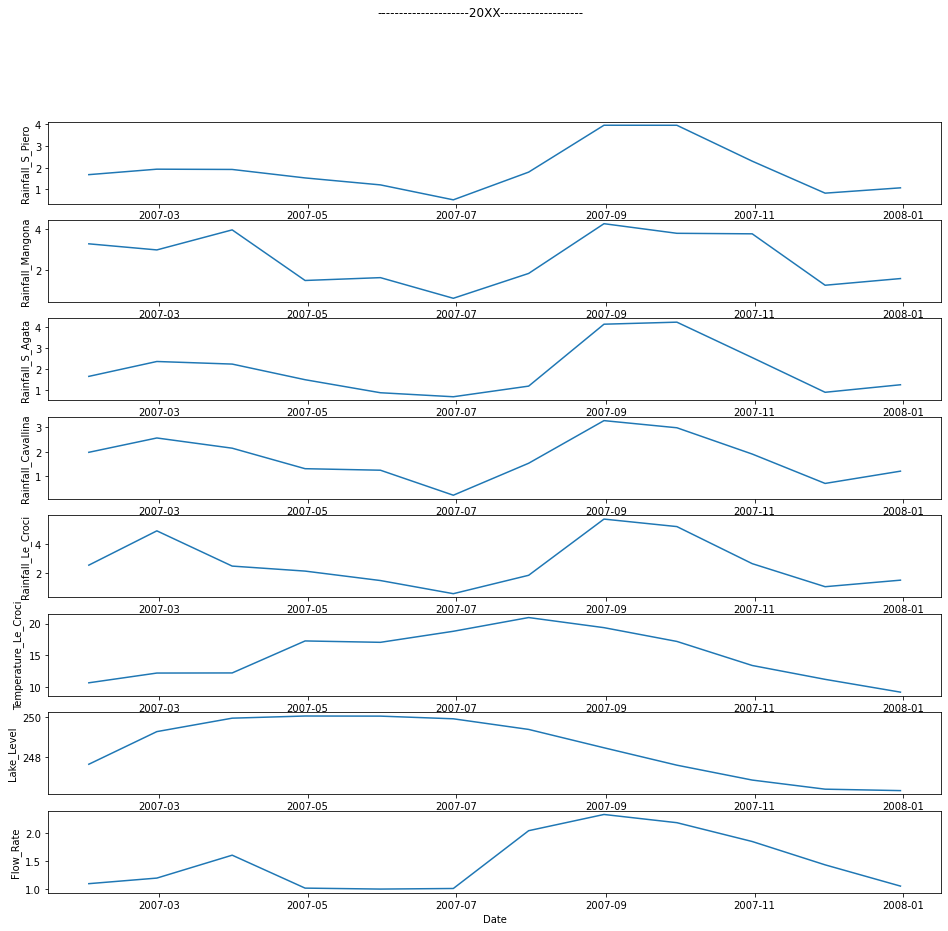

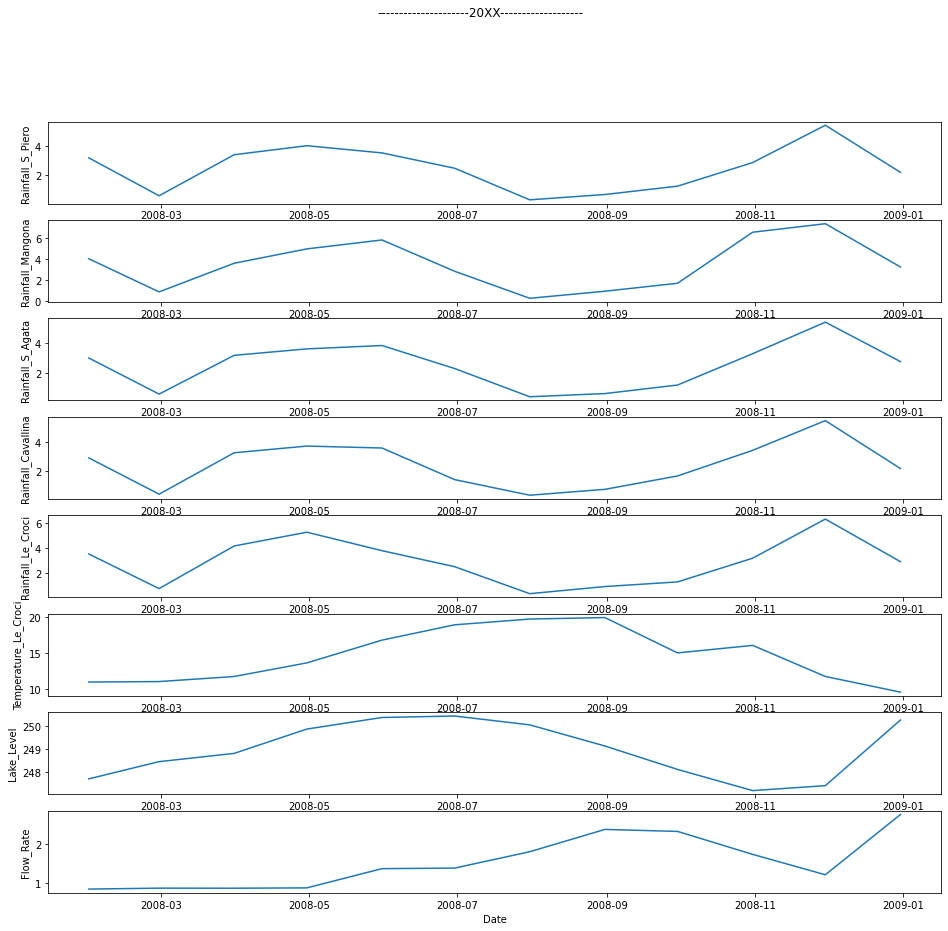

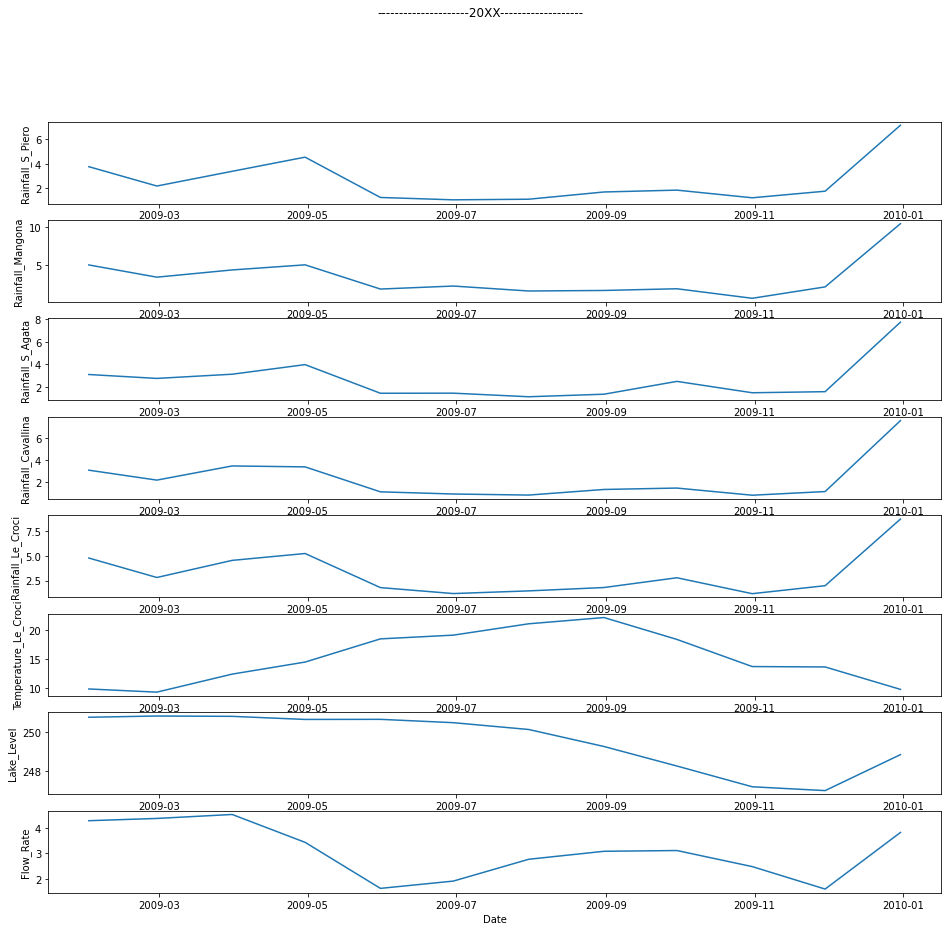

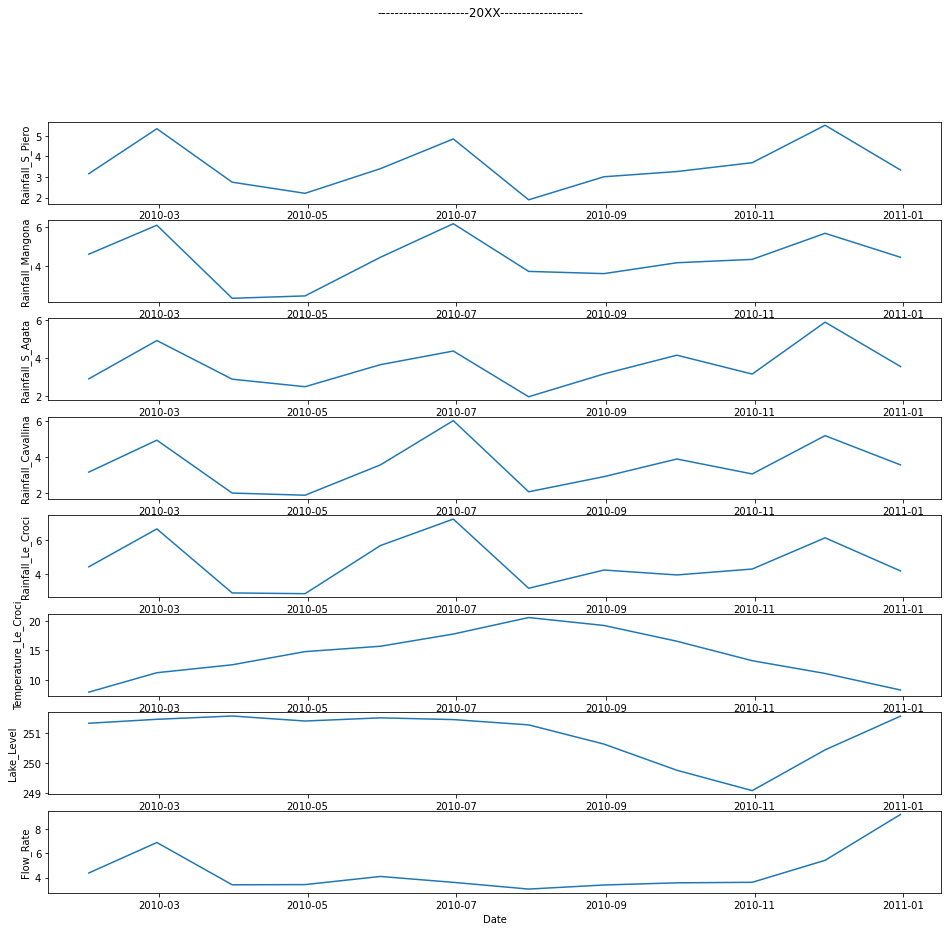

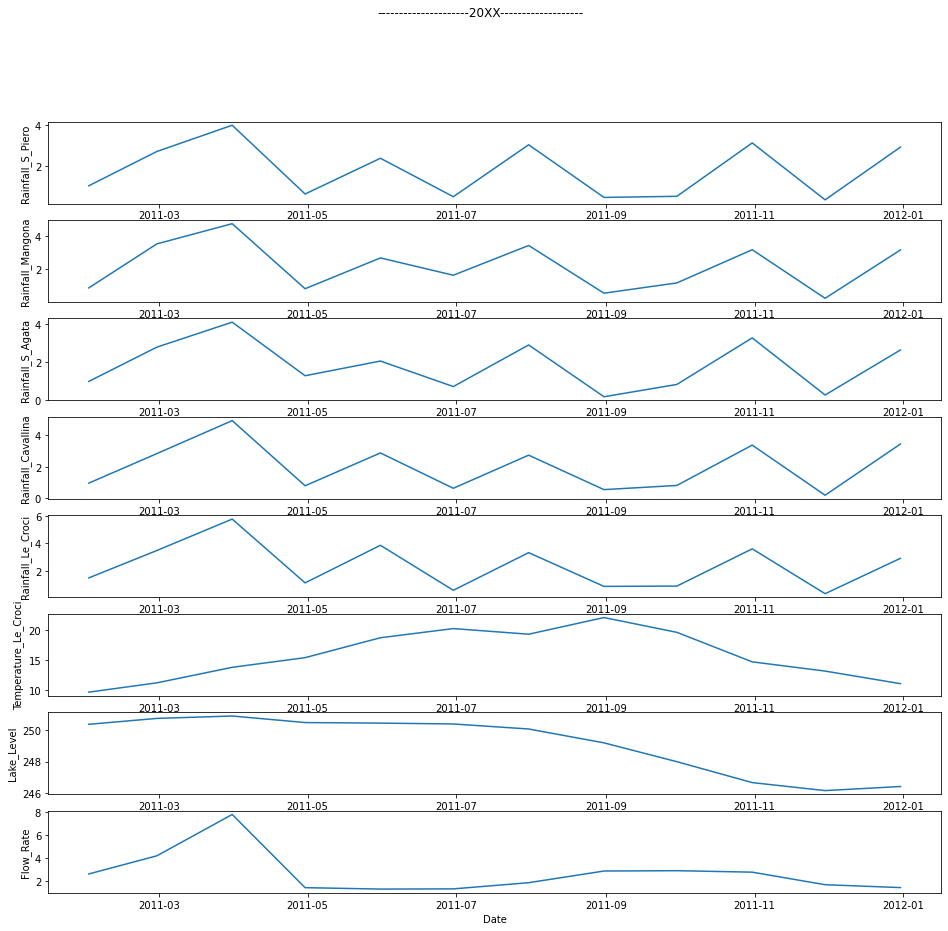

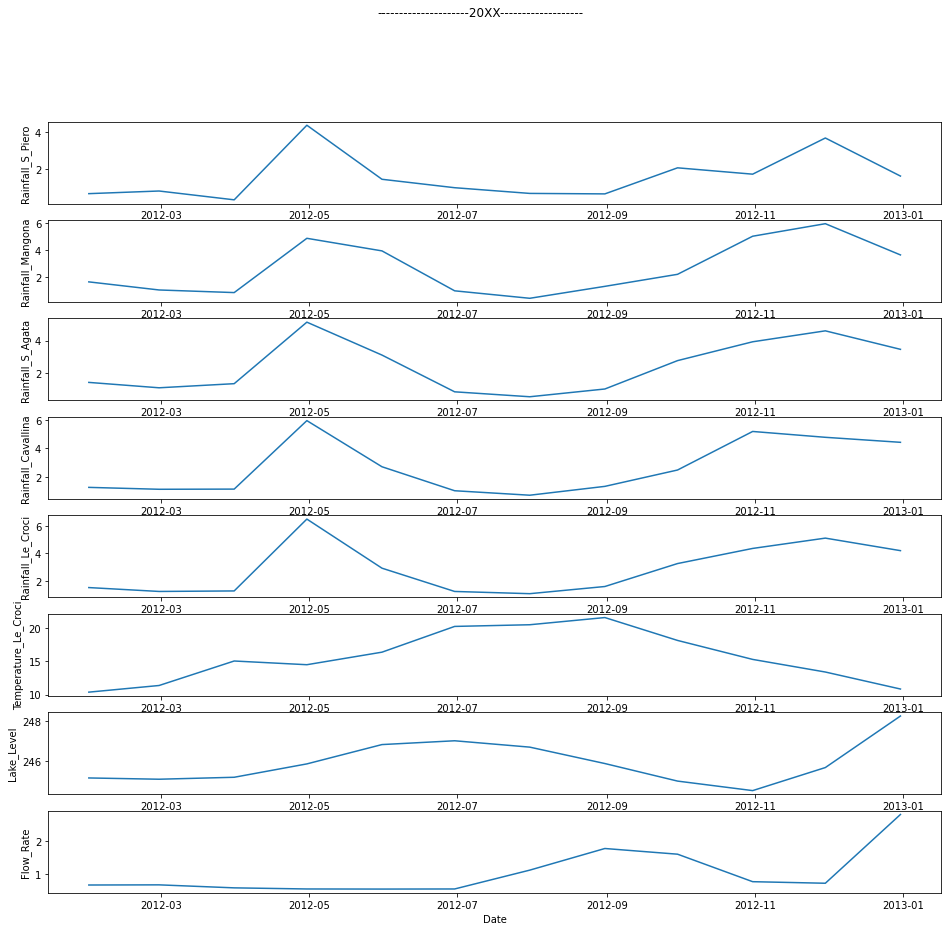

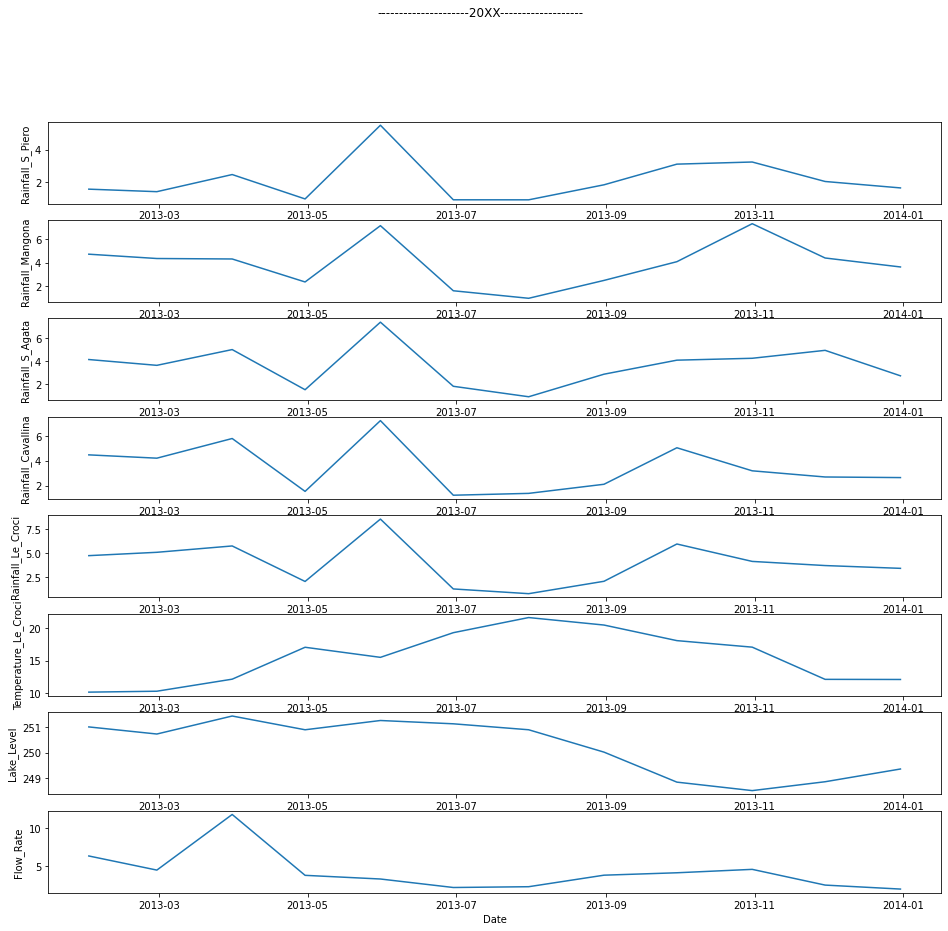

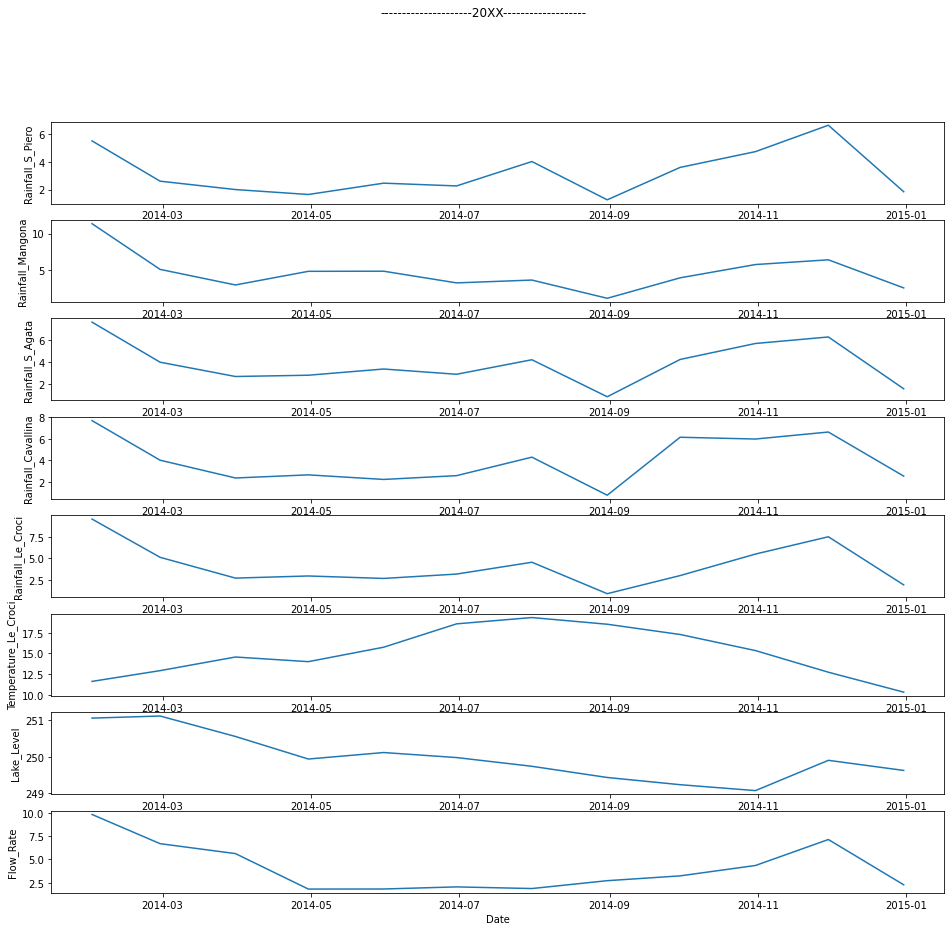

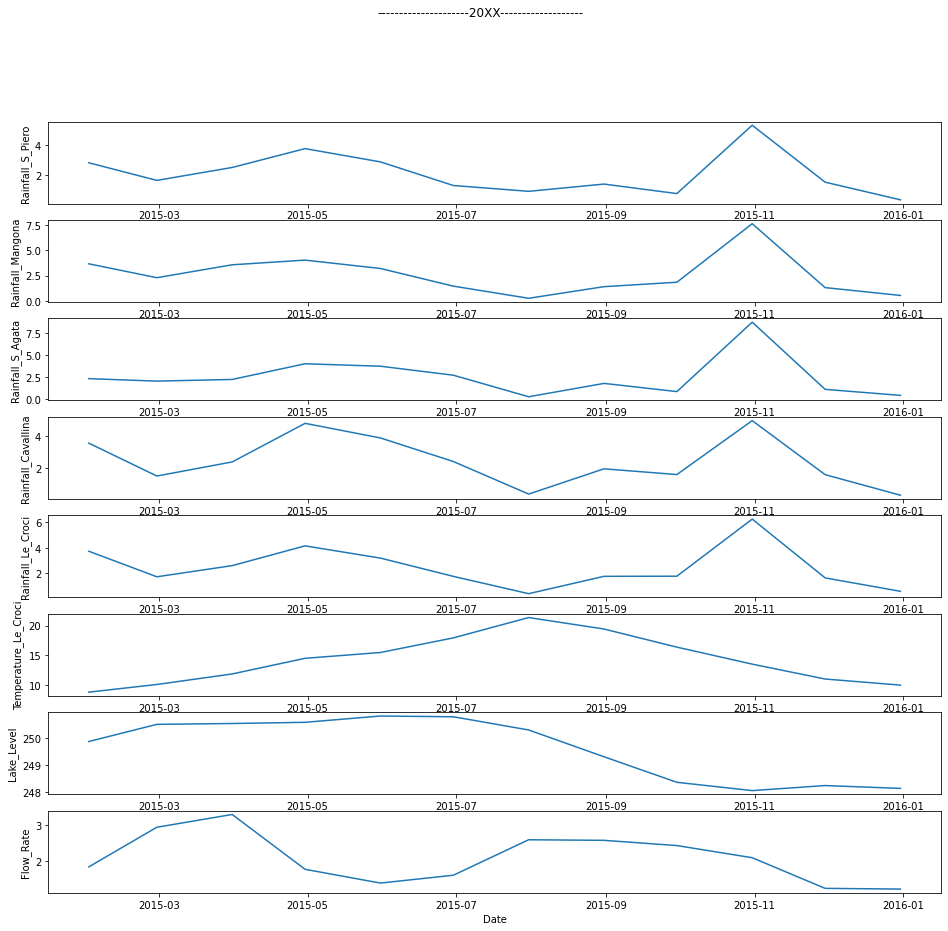

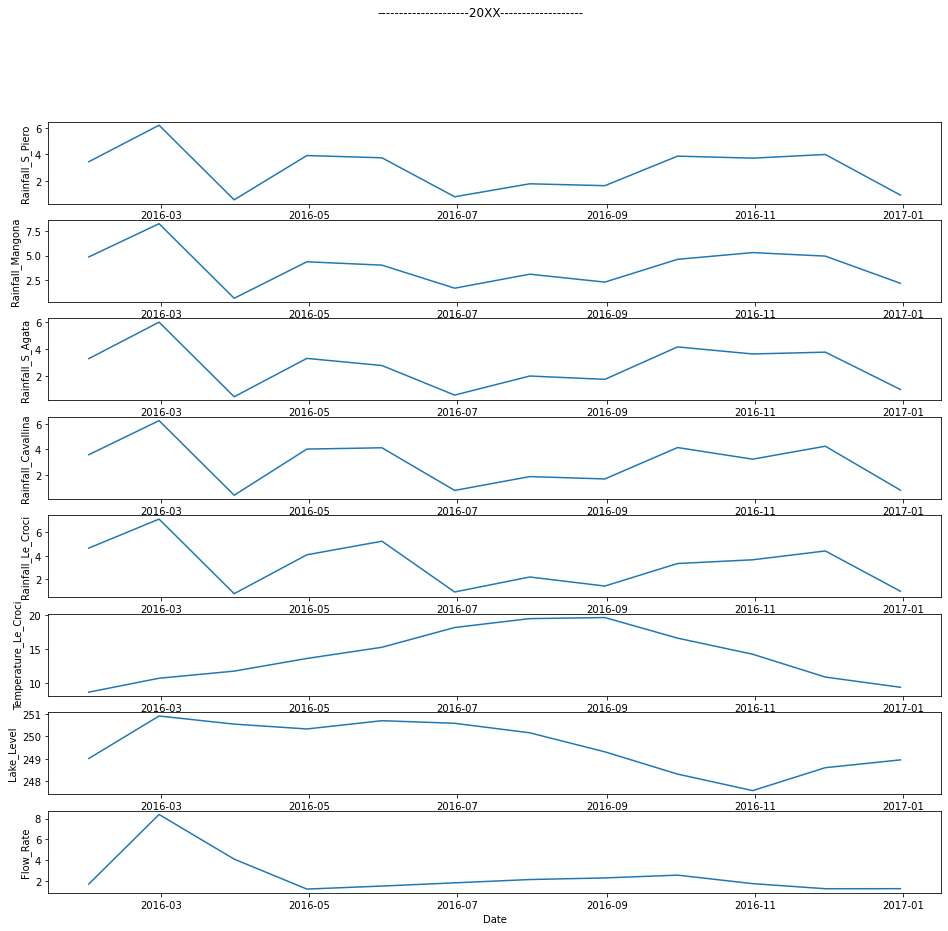

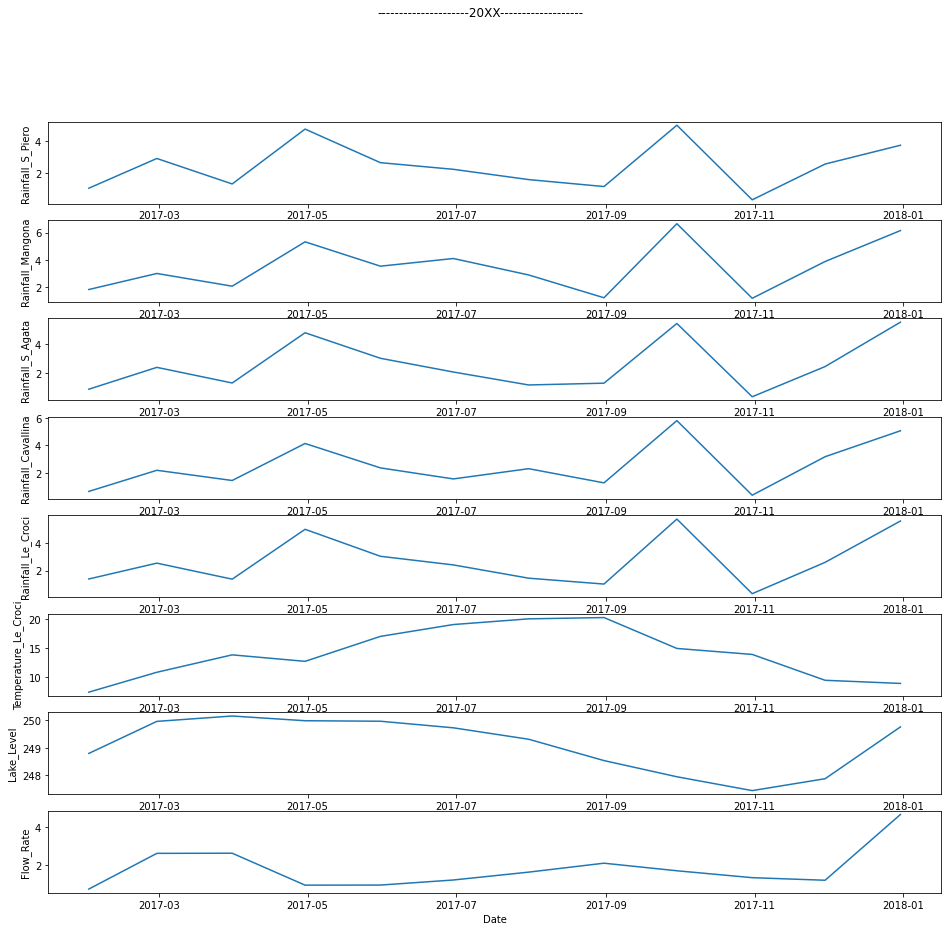

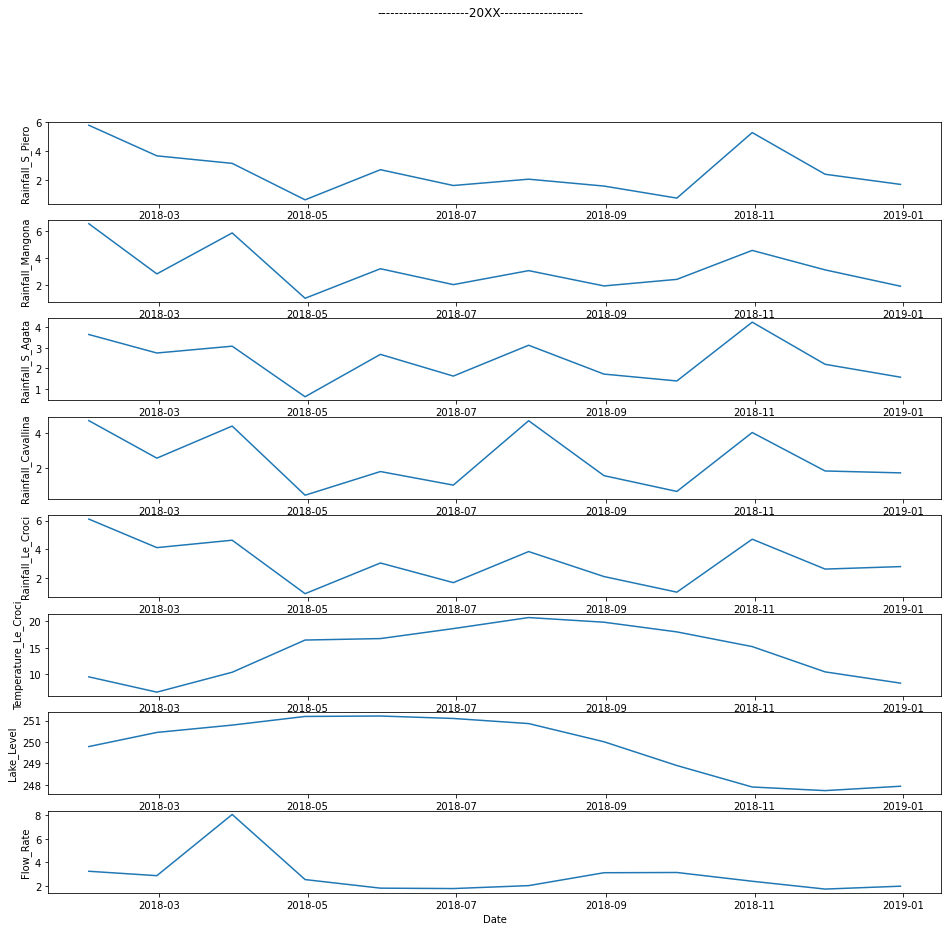

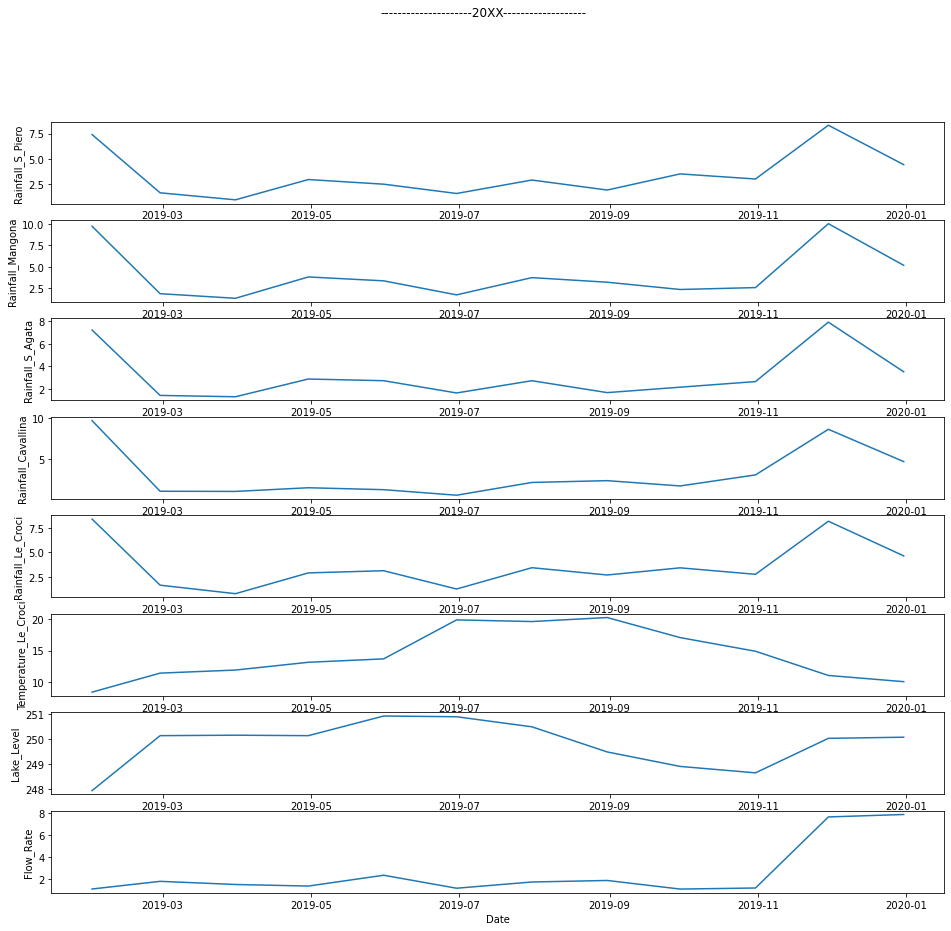

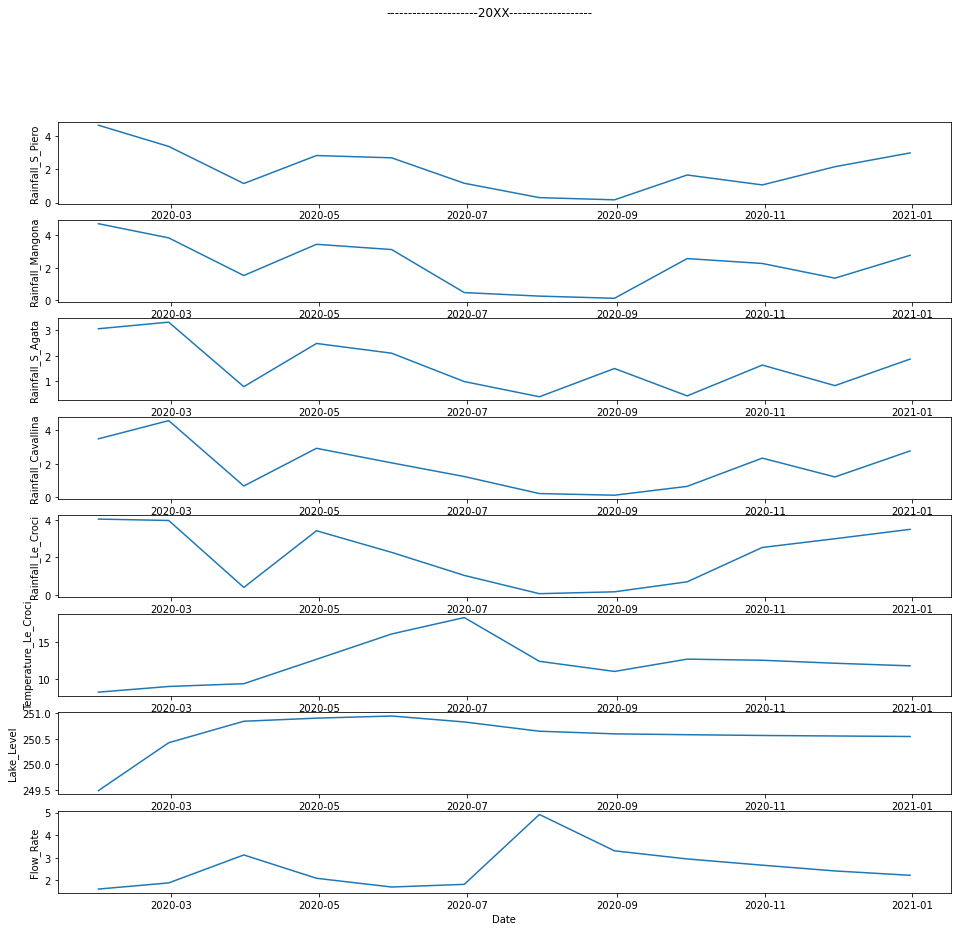

In [111]:
for i in l:
    n = '20'+ i
    m = lake[(lake.index >= n+'-01-01') & (lake.index <= n+'-12-31')]
    o = m.resample('M').mean()
    visual(o)
    

# Takeaway

Shift:
2005-2M
2006-4M-T
2007 :(
2008 - 2M rain, 2MT
2015-2020 also 2M
### I'm going to shift the graphs 2-months since it appears there is a delay time of 2 months from the rain and temperature effect on lake level


# Stats Testing

In [ ]:
stats.spearmanr()

# 2 Month Shift

# Spliting before modeling or learning 

16 years of data

Human split
9 years to train (~55%)
4 years to validate (25%)
3 years to test (~20%)
